In [10]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

In [2]:
path = "/home/jayantabhowmick/workspace/swedish-auto-insurance-regression/slr06.xls"
names = ['Number_Of_Claims','Total_Payment_Claims']
dataframe = pandas.read_excel('slr06.xls', names=names)
array = dataframe.values
X = array[:,0].reshape(-1, 1)
Y = array[:,1]

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [3]:
print(dataframe.describe())

       Number_Of_Claims  Total_Payment_Claims
count         63.000000             63.000000
mean          22.904762             98.187302
std           23.351946             87.327553
min            0.000000              0.000000
25%            7.500000             38.850000
50%           14.000000             73.400000
75%           29.000000            140.000000
max          124.000000            422.200000


In [4]:
print(dataframe.head())

   Number_Of_Claims  Total_Payment_Claims
0               108                 392.5
1                19                  46.2
2                13                  15.7
3               124                 422.2
4                40                 119.4


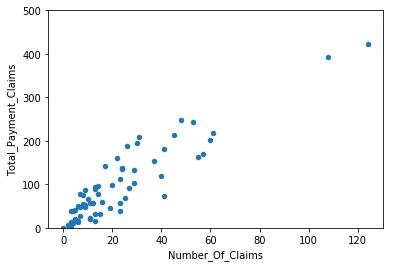

In [5]:
data = pandas.concat([dataframe['Total_Payment_Claims'], dataframe['Number_Of_Claims']], axis=1)
data.plot.scatter(x='Number_Of_Claims', y='Total_Payment_Claims', ylim=(0,500));
plt.show()

In [6]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [7]:
# Linear Regression
models = []
models.append(('LR', LinearRegression()))
models.append(('RID', Ridge()))
models.append(('LAS', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

seed = 7
scoring = 'neg_mean_squared_error'
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f" % (name, cv_results.mean())
    print(msg)

LR: -1498.141886
RID: -1498.122858
LAS: -1497.937036
EN: -1497.623035
KNN: -2893.099304
DTR: -2434.540750
SVR: -9095.660391


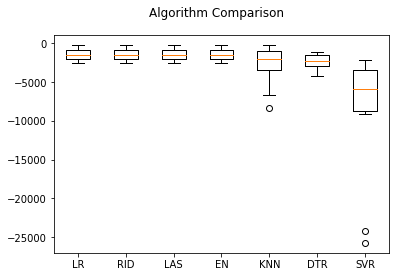

In [8]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [11]:
# Make predictions on validation dataset
en = ElasticNet()
en.fit(X_train, Y_train)
predictions = en.predict(X_validation)
print(mean_squared_error(Y_validation, predictions))
print(explained_variance_score(Y_validation, predictions))
print(r2_score(Y_validation, predictions))

860.3191066245047
0.8182292771901167
0.7185699282479339


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

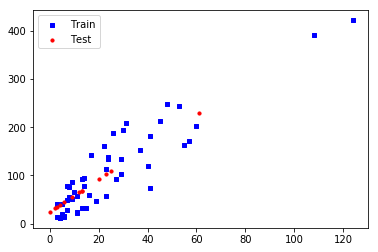

In [22]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

ax1.scatter(X_train, Y_train, s=10, c='b', marker="s", label='Train')
ax1.scatter(X_validation, predictions, s=10, c='r', marker="o", label='Test')
plt.legend(loc='upper left');
plt.show()